In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ts = pd.read_csv('TimeseriesPGDresnet.csv')

In [3]:
ts.drop(ts.columns[0],axis=1,inplace=True)

In [5]:
acc_df = []
modes = ["ValRegularAccuracy", "ValAdversarialAccuracy"]

for i, row in ts.iterrows():
    for mode in modes:
        new_row = {}
        new_row["Dataset"] = row["Dataset"]
        new_row["Model"] = row["Model"]
        new_row["Type"] = mode
        new_row["Accuracy"] = row[mode]
        acc_df.append(new_row)
acc_df = pd.DataFrame.from_records(acc_df)

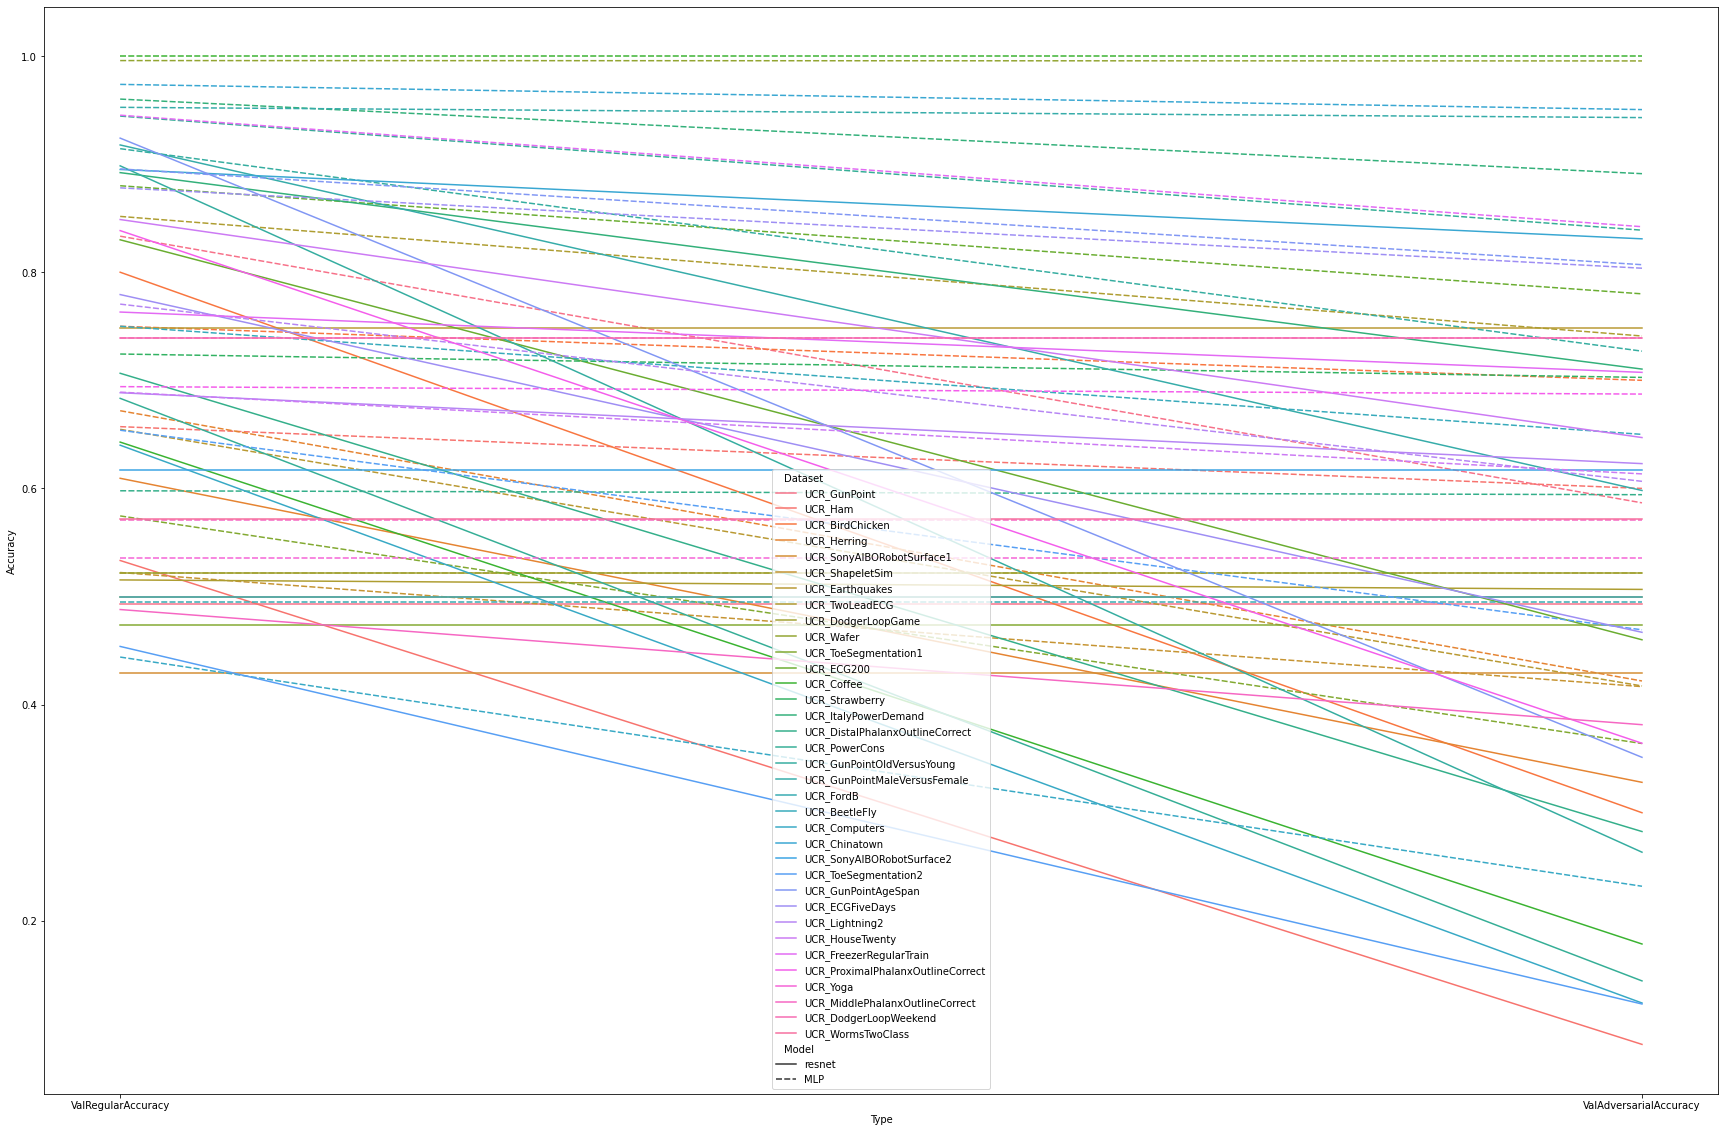

In [6]:
fig, axs = plt.subplots(1,1, figsize=(30,20))
sns.lineplot(x="Type", y="Accuracy", style="Model", hue="Dataset", data=acc_df, sort=False, ax=axs)
fig.savefig("./initial_results.png")

In [7]:
piv = ts.pivot(columns="Model", index="Dataset", values=["ValRegularAccuracy", "ValAdversarialAccuracy"])

<AxesSubplot:xlabel='None-Model', ylabel='Dataset'>

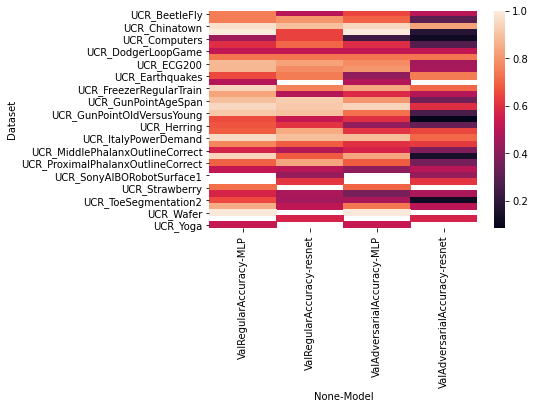

In [8]:
sns.heatmap(data=piv)